> **University of Pisa** \
> **M.Sc. Computer Science, Artificial Intelligence** \
> **Continual learning 2022/23** \
> **Authors**
* Andrea Iommi - a.iommi2@studenti.unipi.it

# Memory Replay GANs
# Learning to generate images from new categories without forgetting
#### [(original paper)](https://proceedings.neurips.cc/paper/2018/hash/a57e8915461b83adefb011530b711704-Abstract.html)
### Notebooks
*   Classical acGAN in offline settings
*   Classical acGAN in online settings
*   **acGAN with join retrain**
*   acGAN with replay alignment

In [2]:
import torch
from Trainer import Trainer
from Utils import custom_mnist
from Plot_functions import generate_classes, plot_history

In [3]:
config = dict(
    device="cuda" if torch.cuda.is_available() else "cpu",
    num_classes=10,
    img_size=32,
    channels=1,
    n_epochs=[100,100],
    batch_size=32,
    embedding=100, # latent dimension of embedding
    lr_g=7e-5, # Learning rate for generator 7e-5
    lr_d=7e-5 # Learning rate for discriminator
    )

## acGAN with join retrain (training)

We create the acGAN with the **join retrain** strategy (method taken from the rehearsal family of methods), the architecture is very similar to the classical acGAN, but in this case, in each experience we concatenate the current data with the buffer. The buffer (or buffer replay) contains some examples (image self generated) of the past experiences in order to control the forgetting.

In this notebook, we present some results varying the number of experiences and the buffer size. In order to avoid the imbalance problems, we fix the max number of example for each class (more detail in the code, see custom_mnist function).

### Join retrain with 2 experiences and buffer size = 4000
The first result shows the method in a straightforward setting where there are only 2 experiences and with the buffer size that is 33% smaller respect the whole dataset (for each class there are approximately 6k examples).

In [ ]:
experiences = [[0,1,2,3,4],[5,6,7,8,9]]
buff_size = 4000
trainer = Trainer(config=config)
history = trainer.fit_join_retrain(experiences=custom_mnist(experiences = experiences,
                                                            max_sampling = buff_size),
                                   buff_img=buff_size)

Of course in the losses, one spike appears in the corrispondence of experience change.

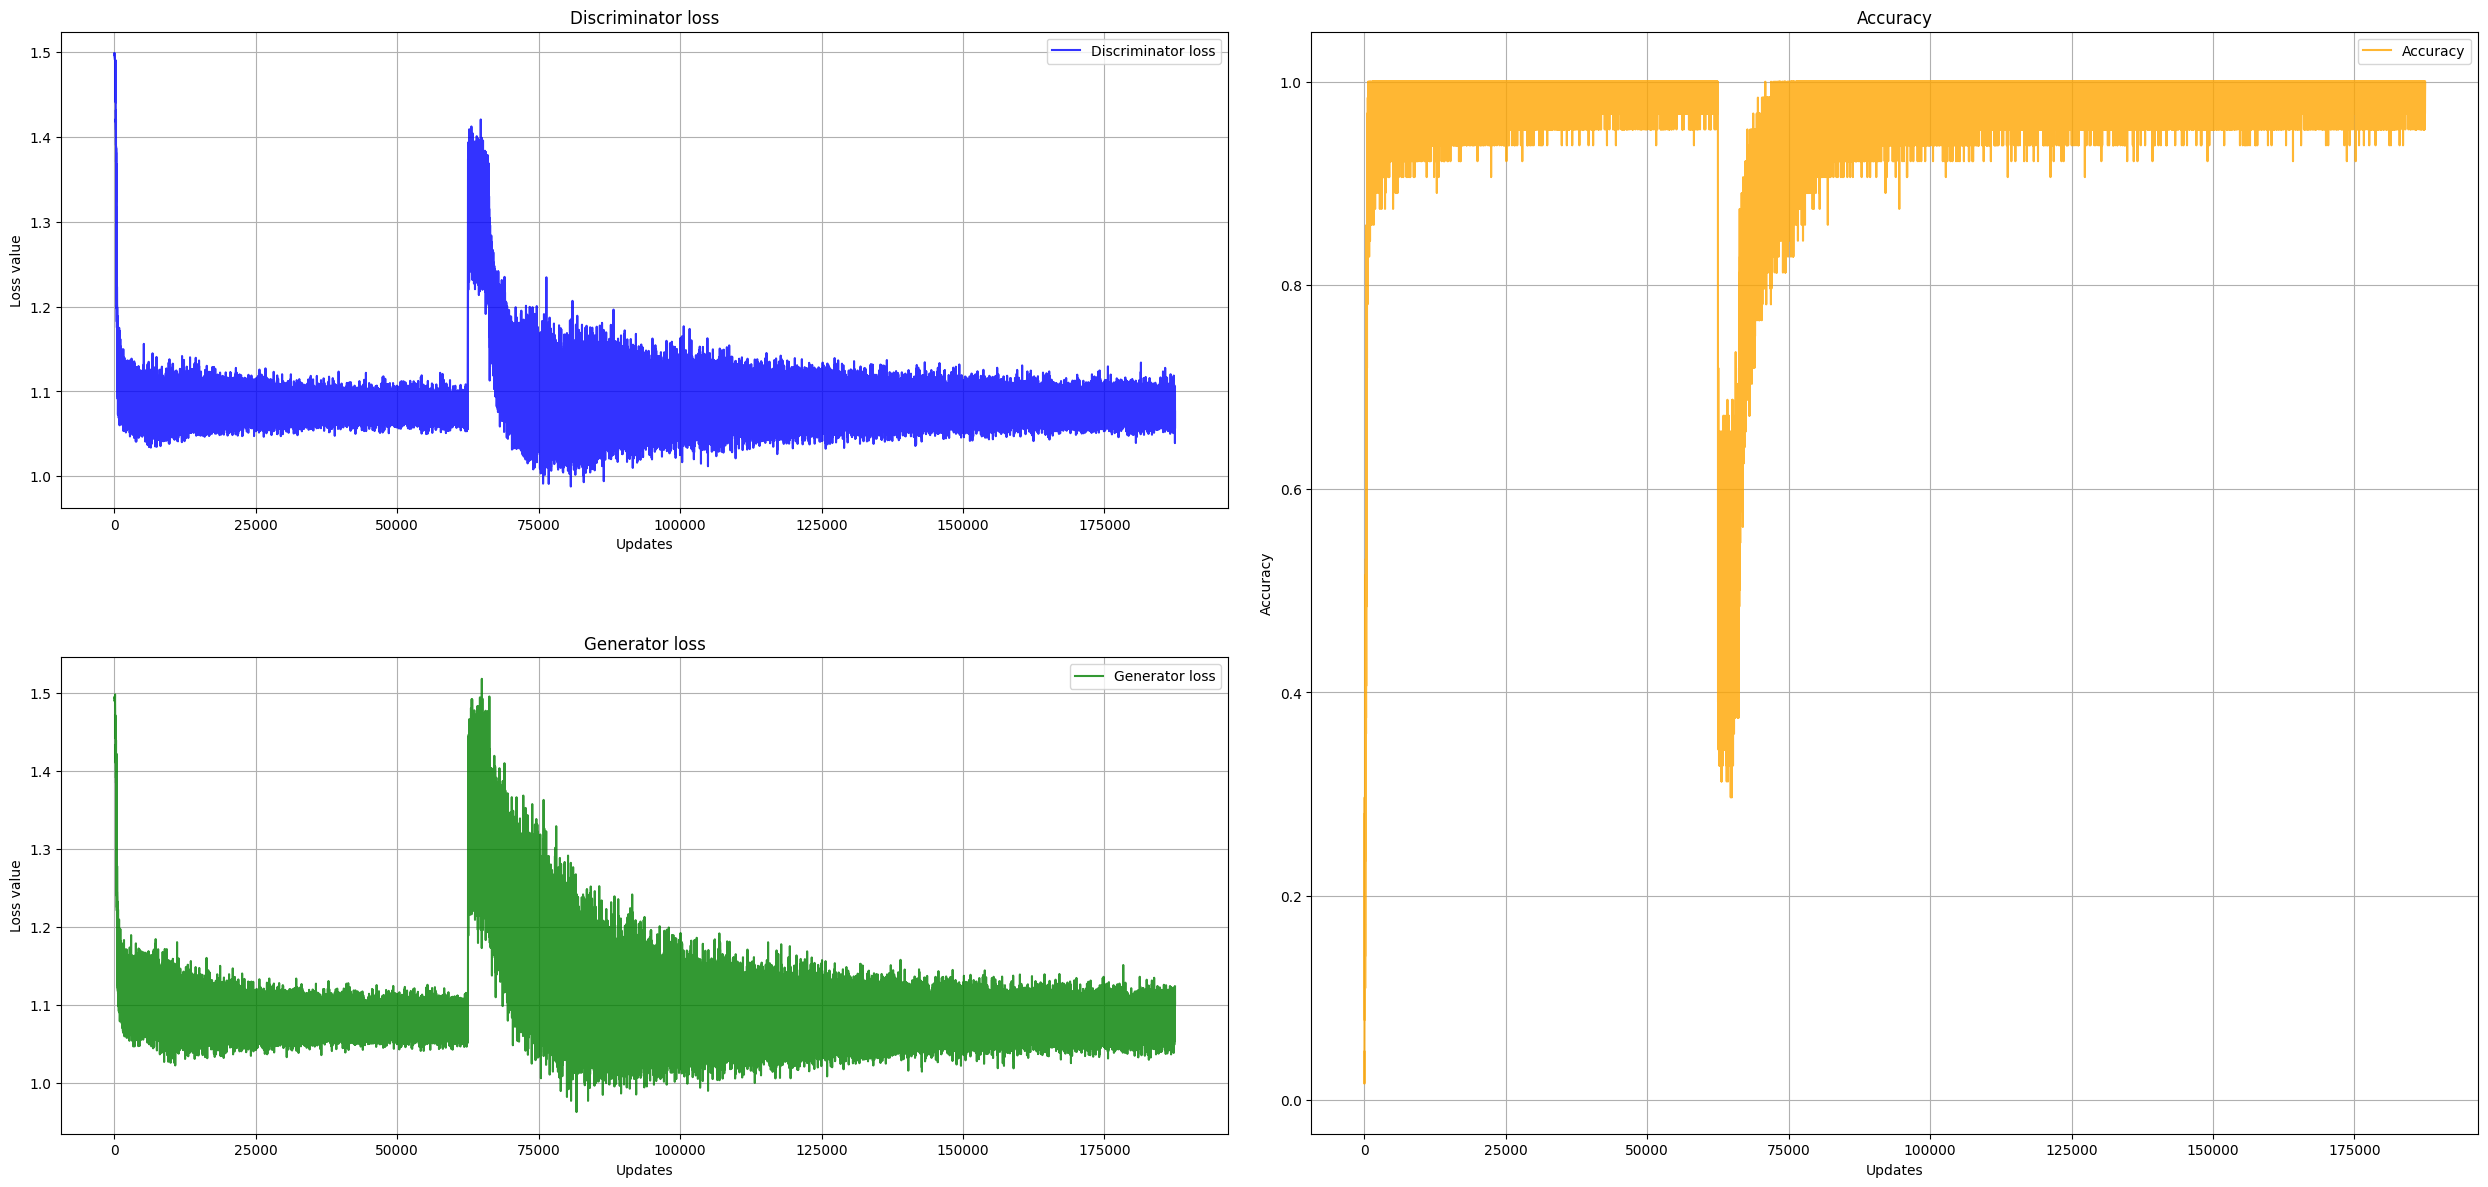

In [ ]:
plot_history(history)

As you can see, the model is able to generate quite well all digits.

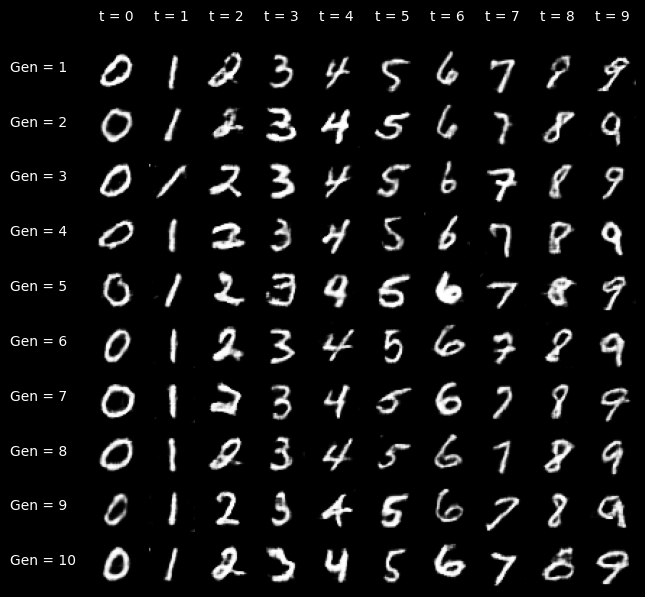

In [ ]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Join retrain with 2 experiences and buffer size = 2000
The method works with buffer size that is 66% smaller respect the whole dataset.

In [ ]:
experiences = [[0,1,2,3,4],[5,6,7,8,9]]
buff_size = 2000
trainer = Trainer(config=config)
history = trainer.fit_join_retrain(experiences=custom_mnist(experiences = experiences,
                                                            max_sampling = buff_size),
                                   buff_img=buff_size)

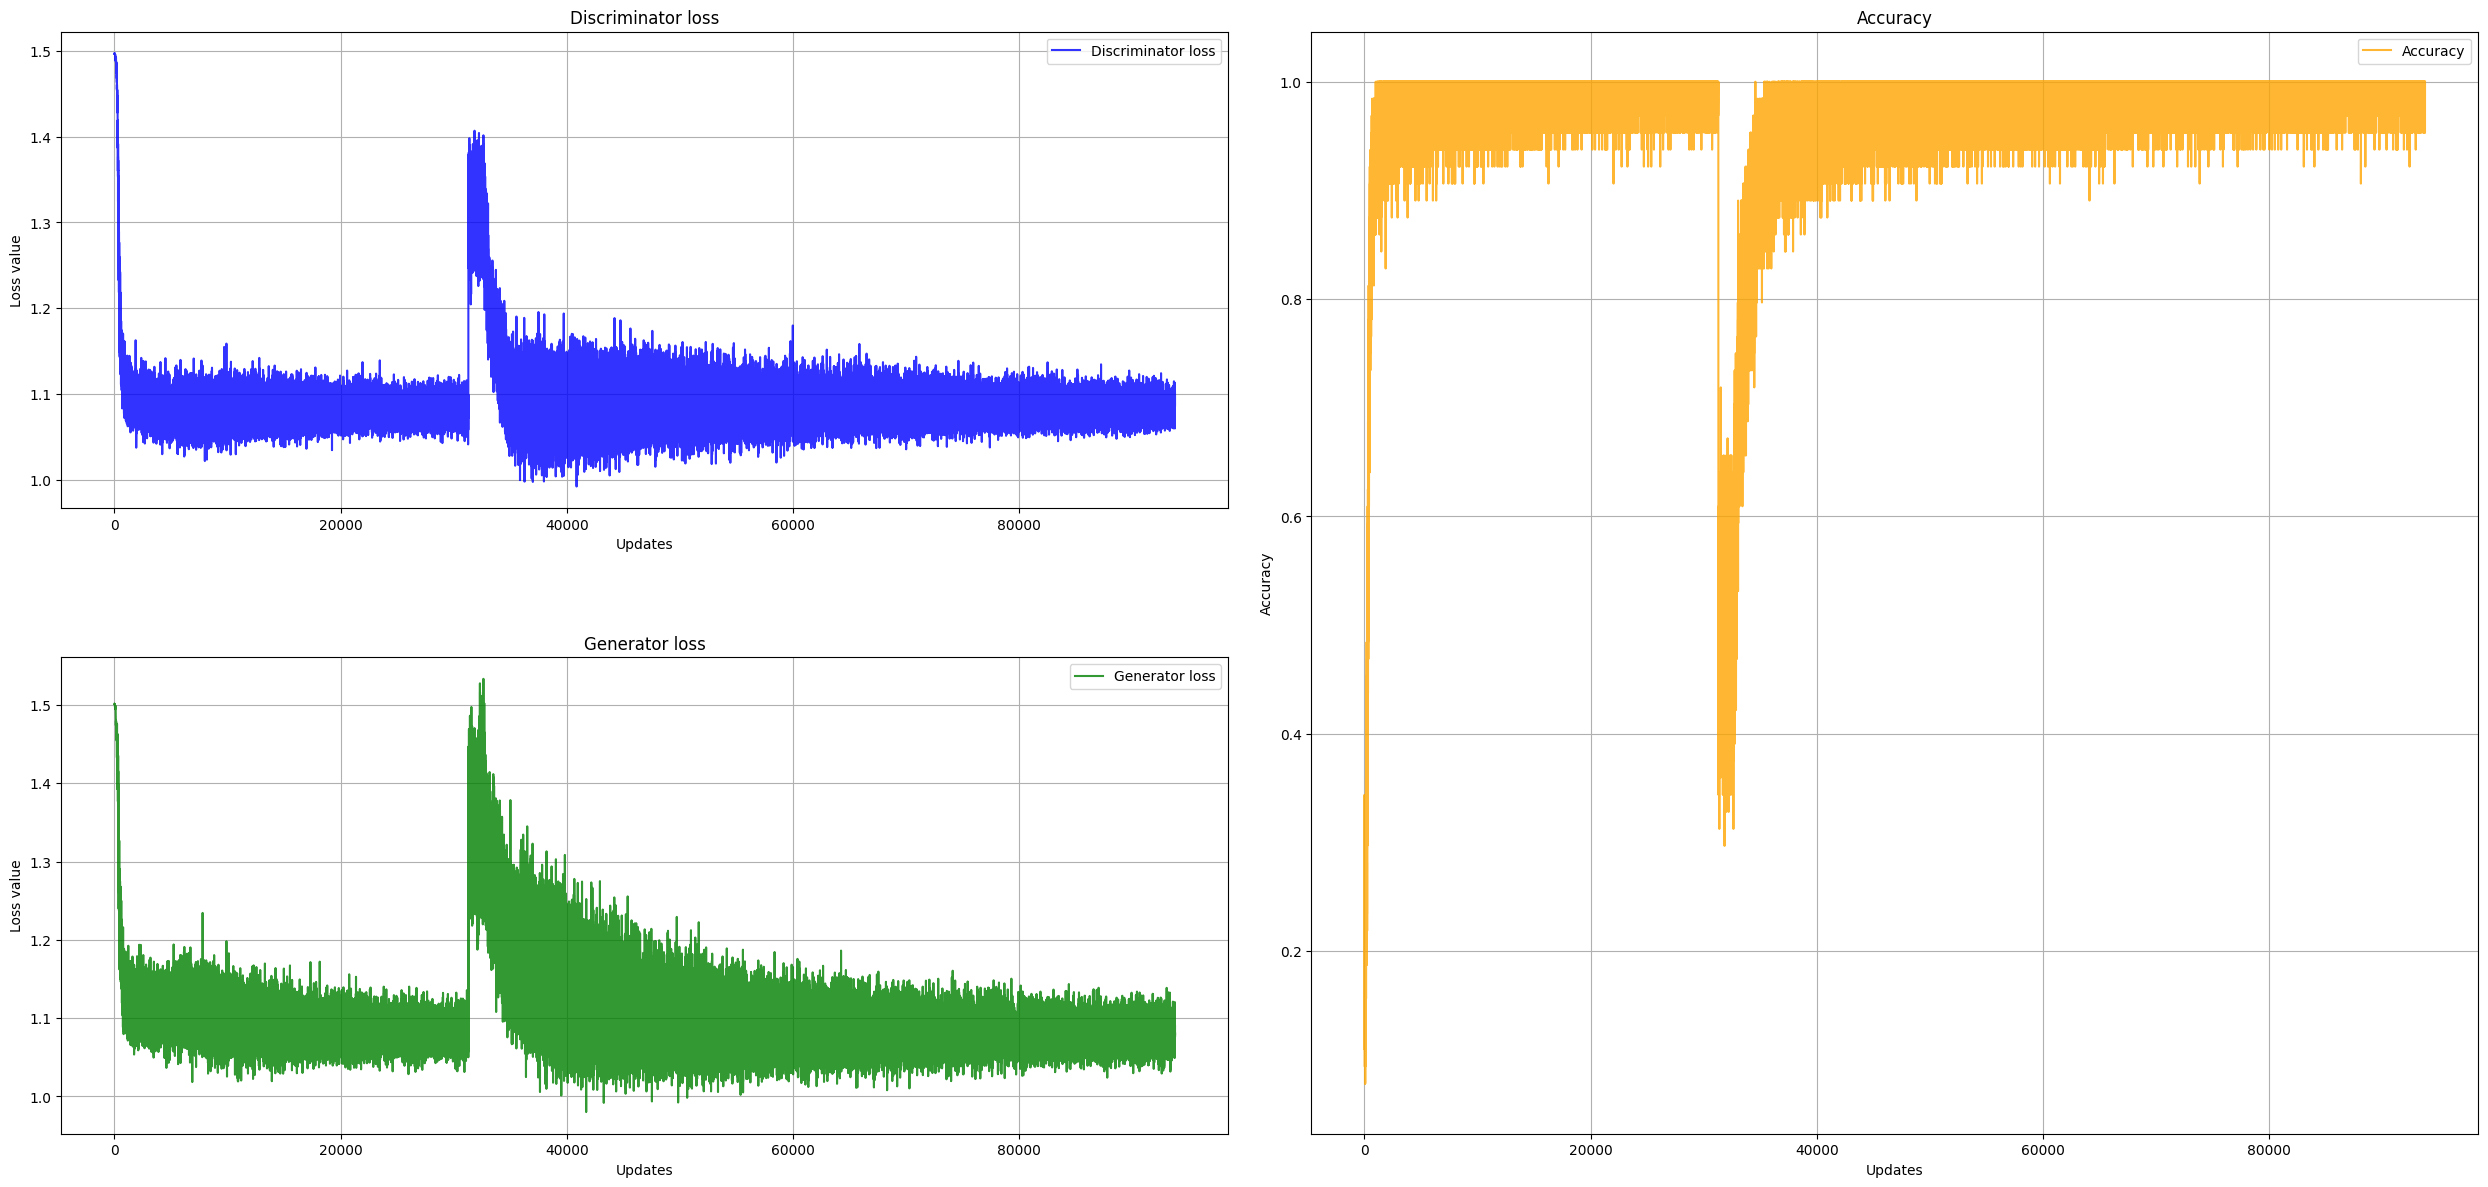

In [ ]:
plot_history(history)

For this kind of configuration, we can observe slightly more noise respect to the previous result. However, the memory is reduced. It's a sort of trade off.

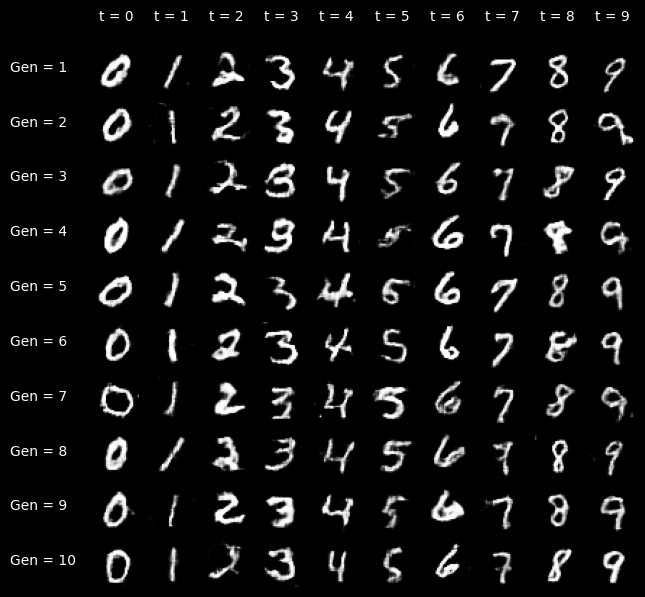

In [ ]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Join retrain with 3 experiences and buffer size = 4000

In this case, we analyze 3 experiences. The **fogetting** becomes more difficult to contrast, the model before starting the third experience, has to generate images (to construct the buffer) for each experience seen.

In [4]:
# For the last experience, more epochs help to converge (improve the quality of images).
config["n_epochs"]=[100, 100, 150]

In [ ]:
experiences = [[0,1,2],[3,4,5],[6,7,8,9]]
buff_size = 4000
trainer = Trainer(config=config)
history = trainer.fit_join_retrain(experiences=custom_mnist(experiences = experiences,
                                                            max_sampling = buff_size),
                                   buff_img=buff_size)

Since we have 3 experiences, we can notice 3 spikes.

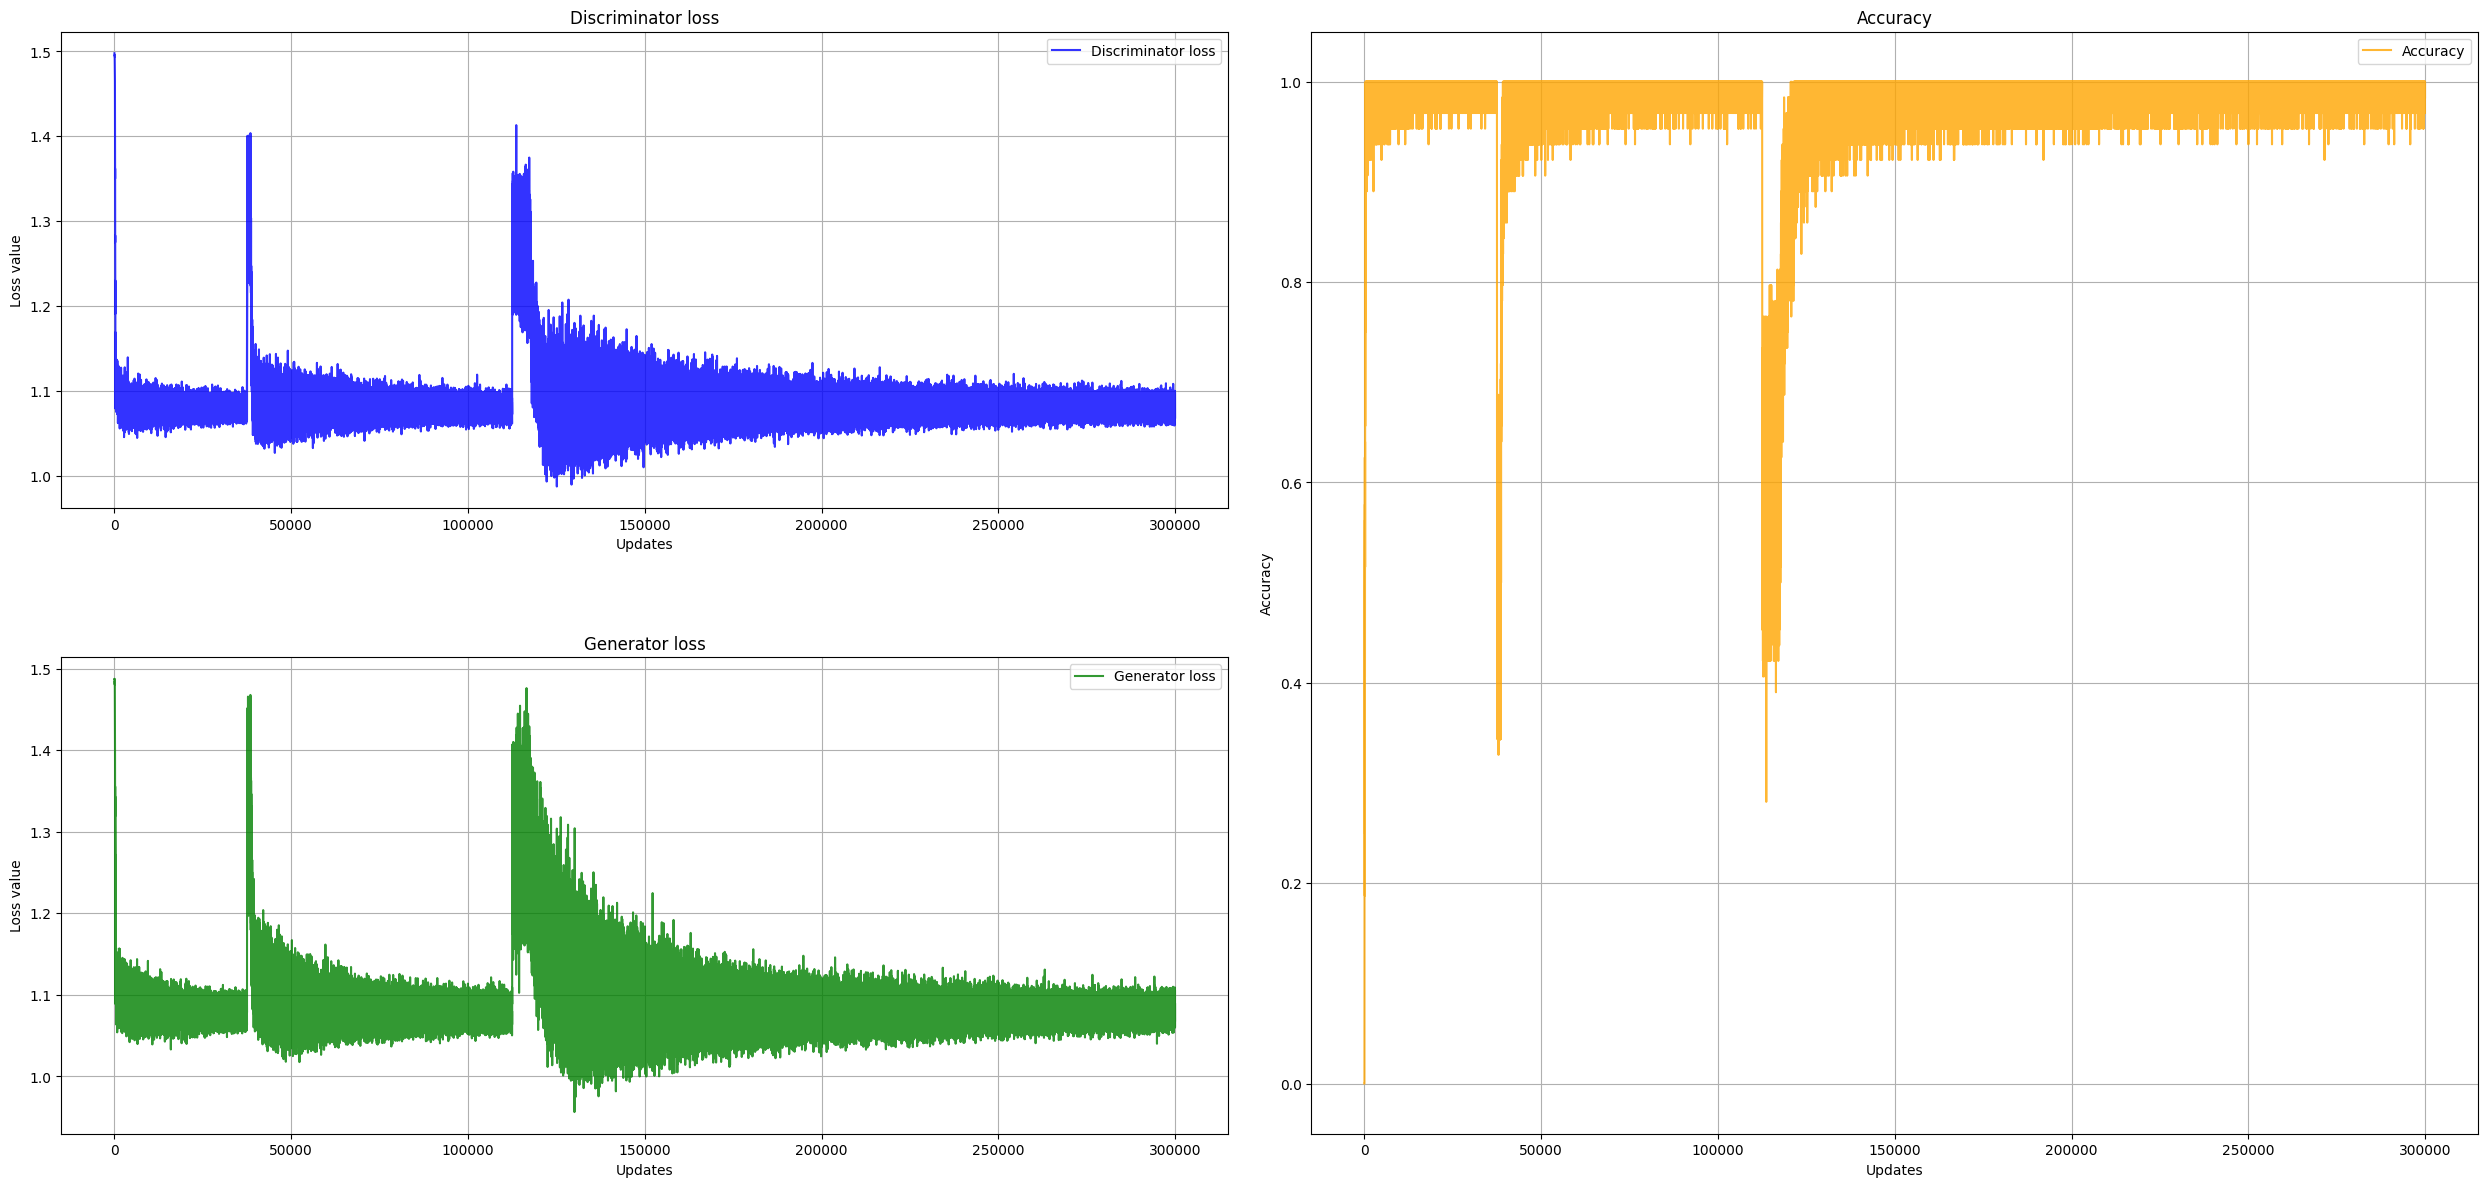

In [ ]:
plot_history(history)

With this setting, all digits become less clear, but we have still good quality.

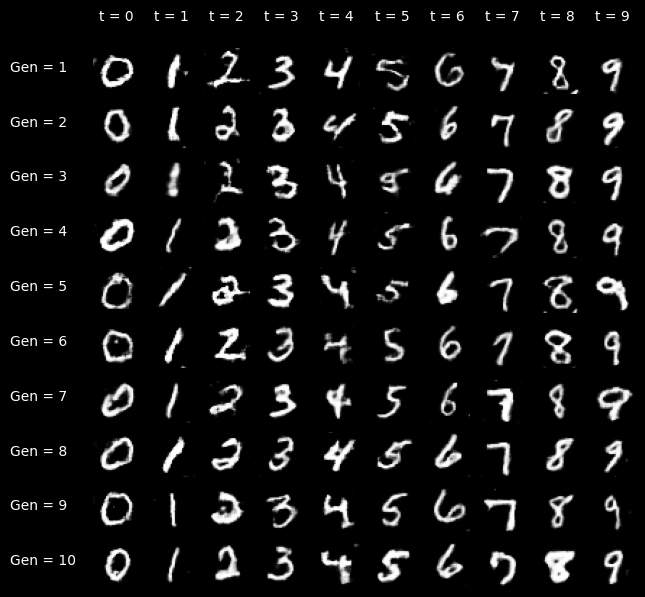

In [ ]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Join retrain with 3 experiences and buffer size = 2000

In [ ]:
experiences = [[0,1,2],[3,4,5],[6,7,8,9]]
buff_size = 2000
trainer = Trainer(config=config)
history = trainer.fit_join_retrain(experiences=custom_mnist(experiences = experiences,
                                                            max_sampling = buff_size),
                                   buff_img=buff_size)

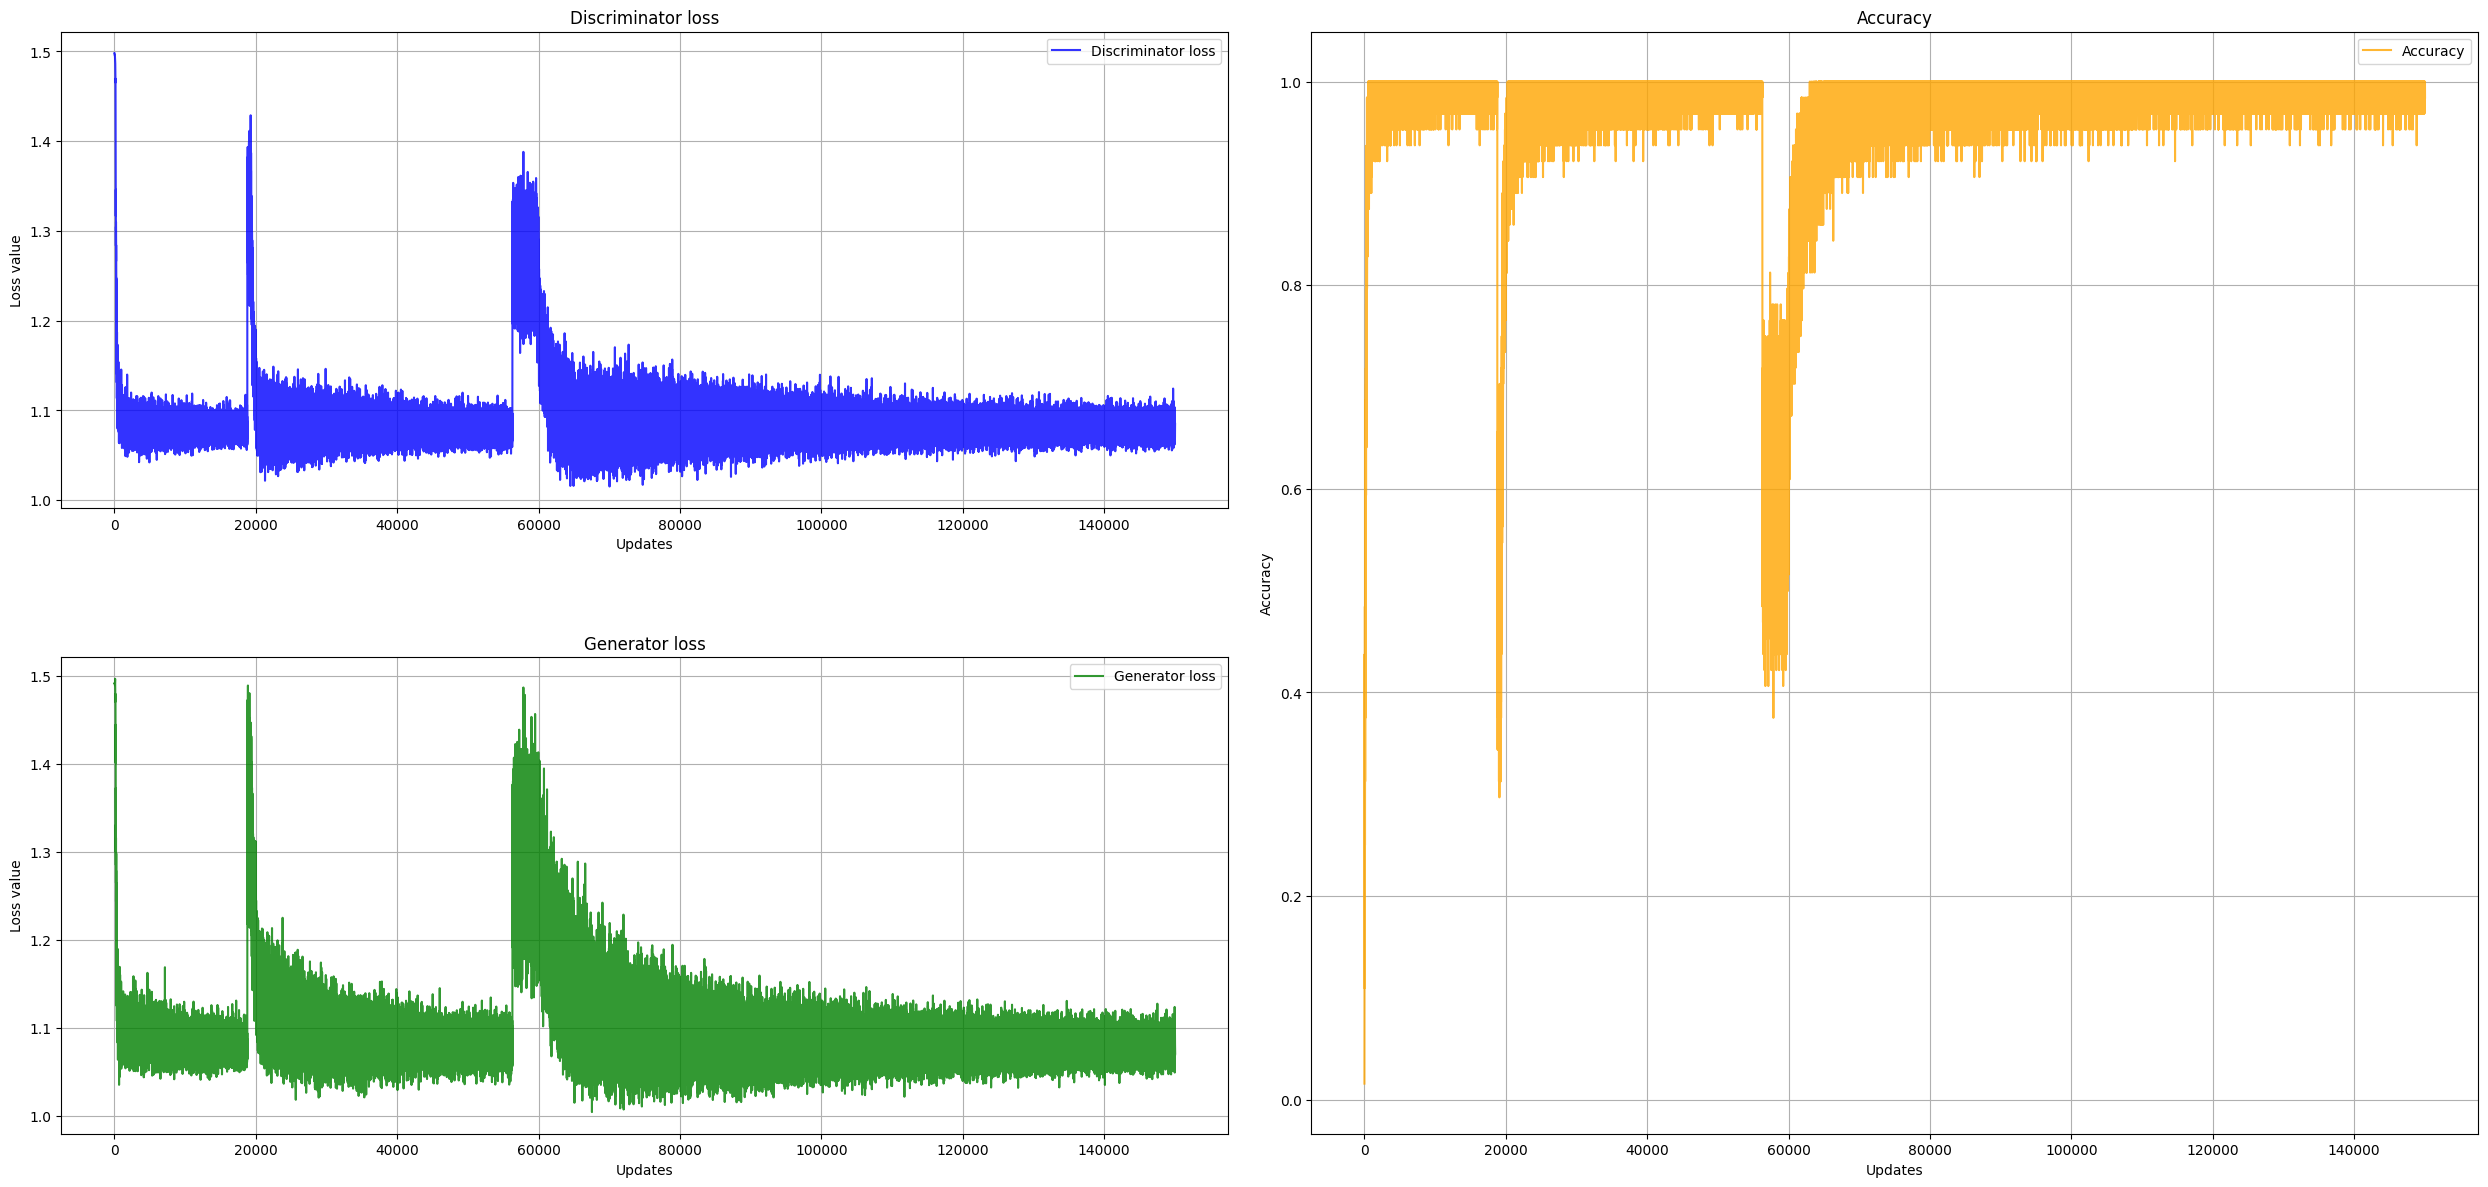

In [6]:
plot_history(history)

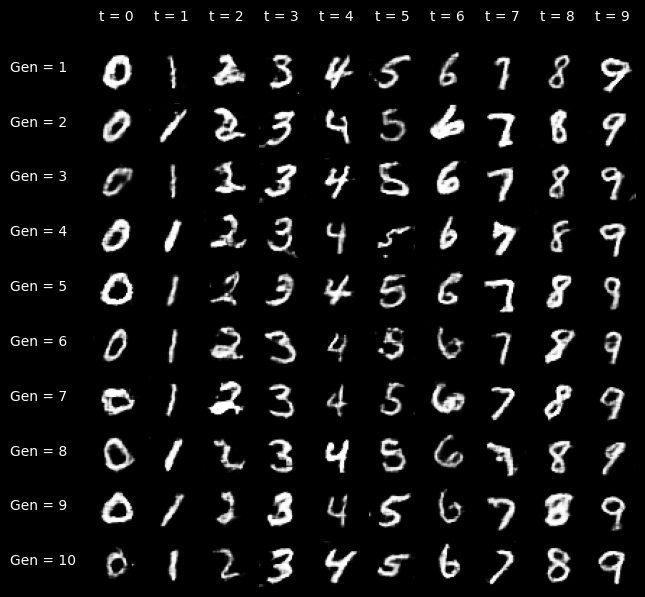

In [7]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Join retrain with 10 experiences and buffer size = 3000

Here, we have the most difficult setting where the model learns one digit for each experience with the buffer 50% smaller than the whole dataset.

In [ ]:
config["n_epochs"] = [50,50,50,50,50,50,50,50,50,50]
experiences = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
buff_size = 3000
trainer = Trainer(config=config)
history = trainer.fit_join_retrain(experiences=custom_mnist(experiences = experiences,
                                                            max_sampling = buff_size),
                                   buff_img=buff_size)

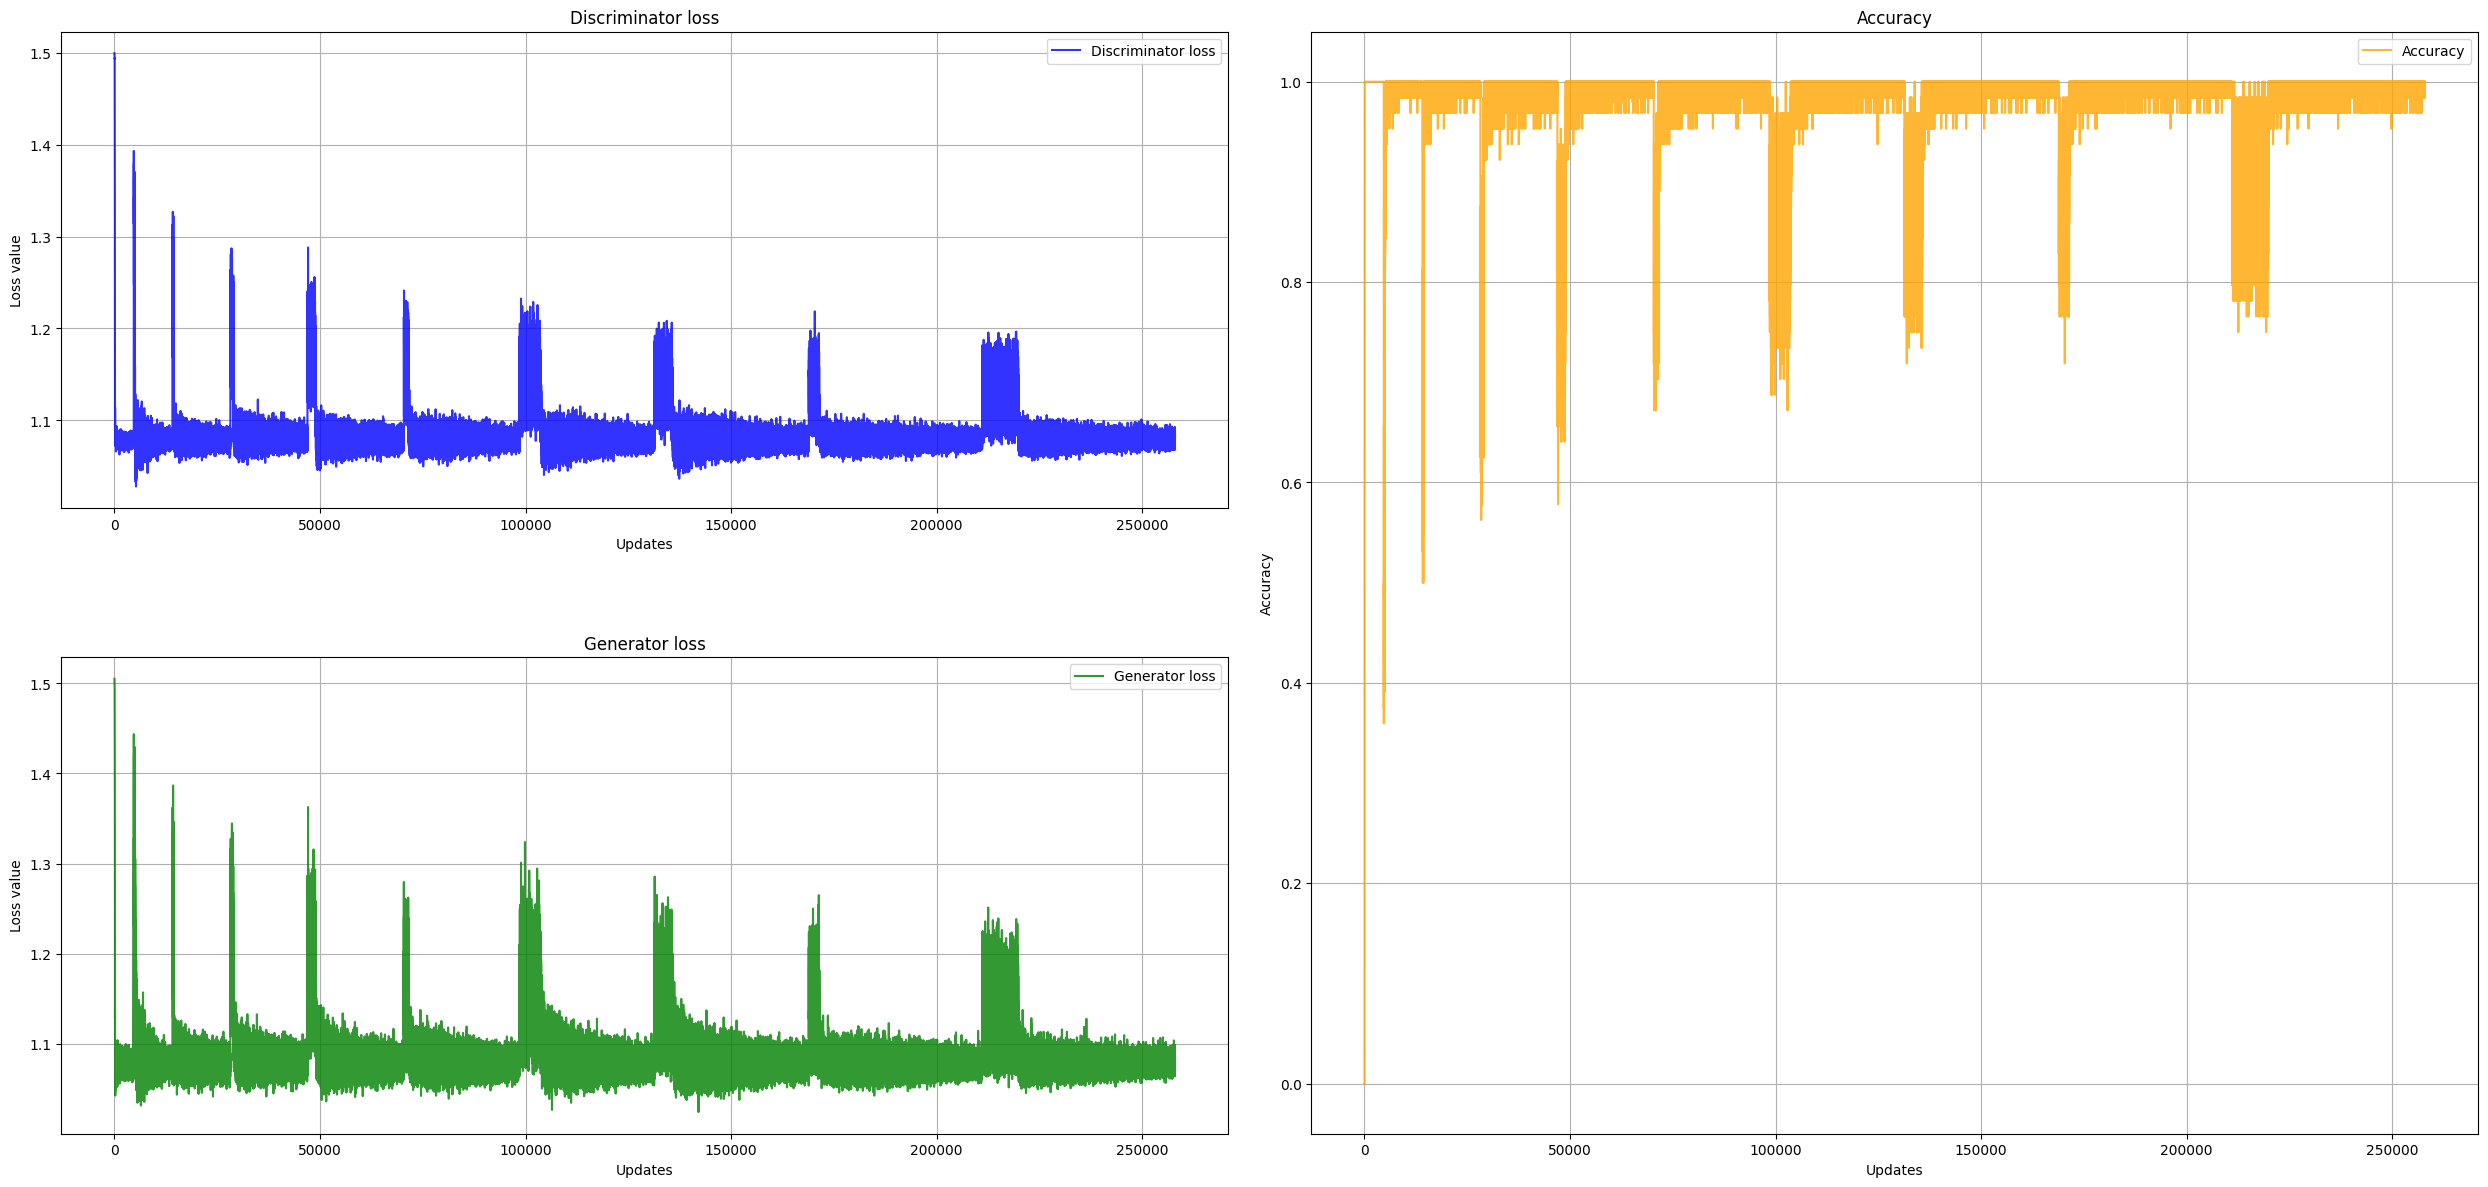

In [9]:
plot_history(history)

The results are noisy, but with this configuration is acceptable.

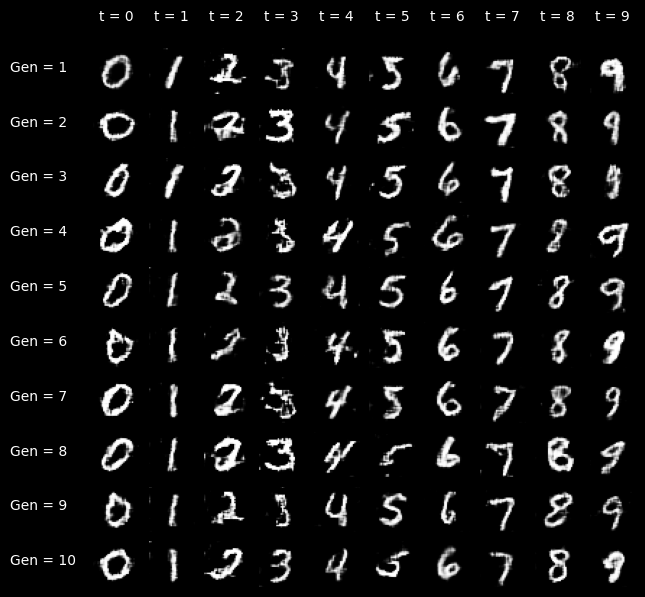

In [10]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])